In [29]:
!pip install tensorflow

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv("C:/Users/rugwe/Downloads/agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [32]:
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y = df[['Yield_kg_per_hectare']]

In [33]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\rugwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])  # Use metrics suitable for regression

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.6,random_state=42)

In [37]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 281194.5938 - mean_absolute_error: 457.8671 - val_loss: 55977.0508 - val_mean_absolute_error: 189.7830
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48840.8086 - mean_absolute_error: 175.3872 - val_loss: 47333.3867 - val_mean_absolute_error: 174.8308
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47125.8945 - mean_absolute_error: 174.4151 - val_loss: 41969.4375 - val_mean_absolute_error: 164.5589
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38752.1055 - mean_absolute_error: 158.1350 - val_loss: 37596.1953 - val_mean_absolute_error: 156.9381
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35439.6016 - mean_absolute_error: 153.4027 - val_loss: 34653.4375 - val_mean_absolute_error: 151.8640
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34765.1016 - mean_absolute_error: 152.2084 - val_loss: 32224.6172 - val_mean_absolute_error: 146.2609
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0

In [38]:
test_loss, test_mae = model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3094.2815 - mean_absolute_error: 45.2048 
Test Mean Absolute Error: 44.68


In [39]:
y_pred = model.predict(X_test)
y_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


array([[985.8785 ],
       [847.871  ],
       [624.48474],
       ...,
       [649.3336 ],
       [766.5751 ],
       [661.01587]], dtype=float32)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

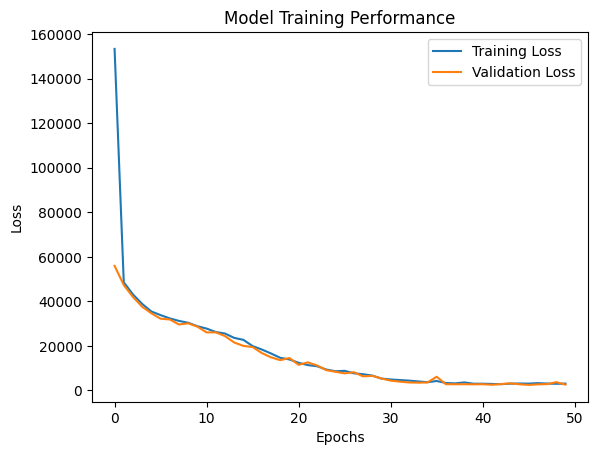

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

C:\Users\rugwe\AppData\Local\Temp\ipykernel_15524\54570079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\rugwe\AppData\Local\Temp\ipykernel_15524\54570079.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


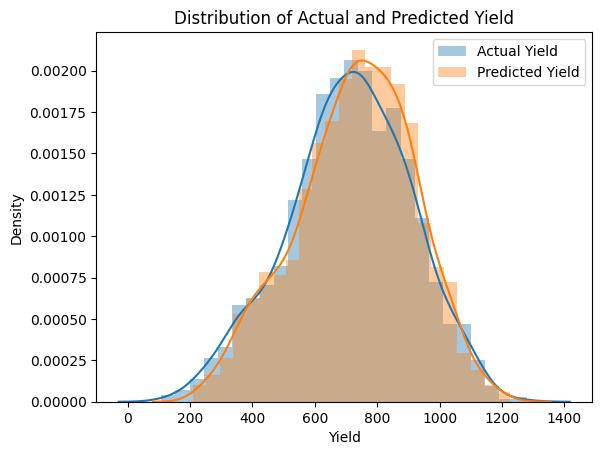

In [45]:
# Distribution plots
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

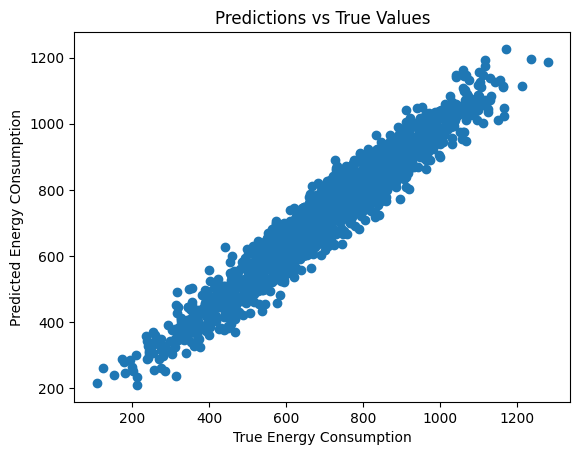

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel('Predicted Energy COnsumption')
plt.title("Predictions vs True Values")
plt.show()